# 1- Importation des packages et importer les données

In [1]:
# Importation des packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.decomposition as PCA
import sklearn.preprocessing as StandardScaler
import scipy.stats as stats

In [3]:
# Importation du Dataframe

df = pd.read_csv("iris.csv")

In [5]:
# Importation du Dataframe

#df = pd.read_csv("iris.csv")

df = sns.load_dataset("iris")

# Affichons les premieres lignes du tableau

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Analysons la dimension de la base de donnees

df.shape

(150, 5)

In [7]:
# Analysons le type de variable dans la base de donnees

df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# Analysons les donnees manquantes

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# 2- Analyses descriptives univariées

In [9]:
# Analyse descriptive du jeu de donnees

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# Description des variables qualitatives

df.describe(include = "object")

,species
count,150
unique,3
top,setosa
freq,50


<Axes: >

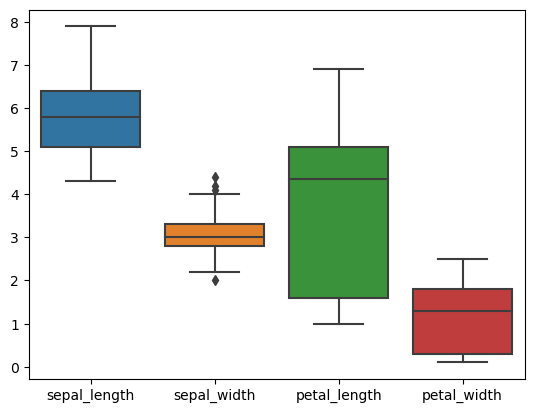

In [11]:
# Analyse descriptive des variables quantitatives

sns.boxplot(data = df)

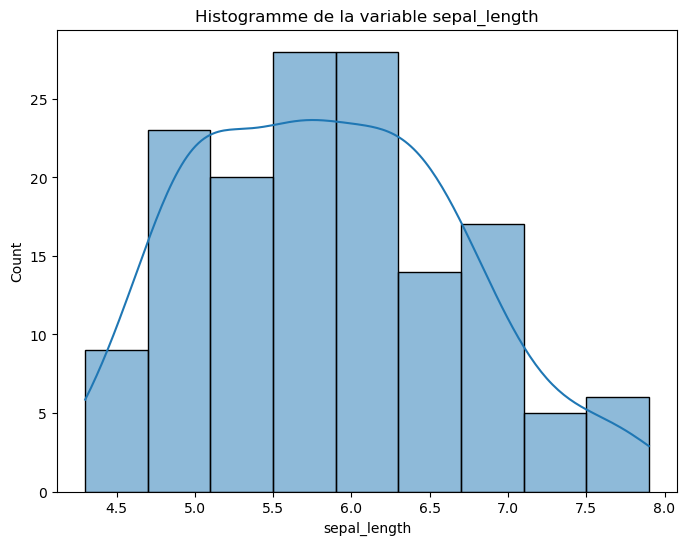

La variable sepal_length suit une loi normale (p_value = 0.05682424941067306)


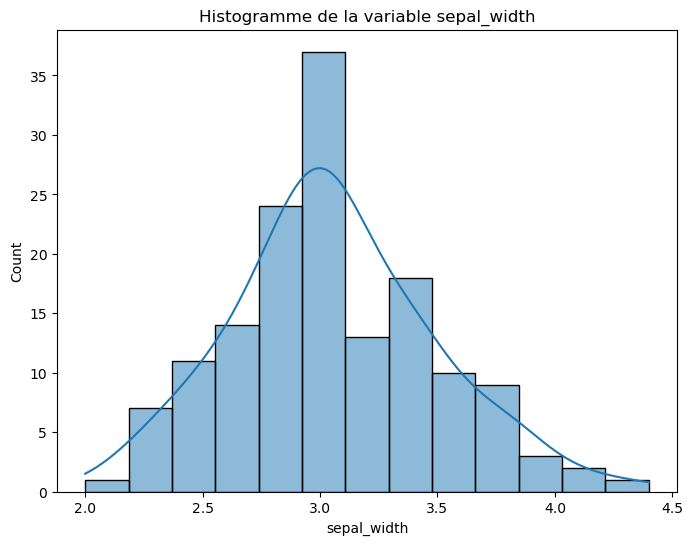

La variable sepal_width suit une loi normale (p_value = 0.2097338099298262)


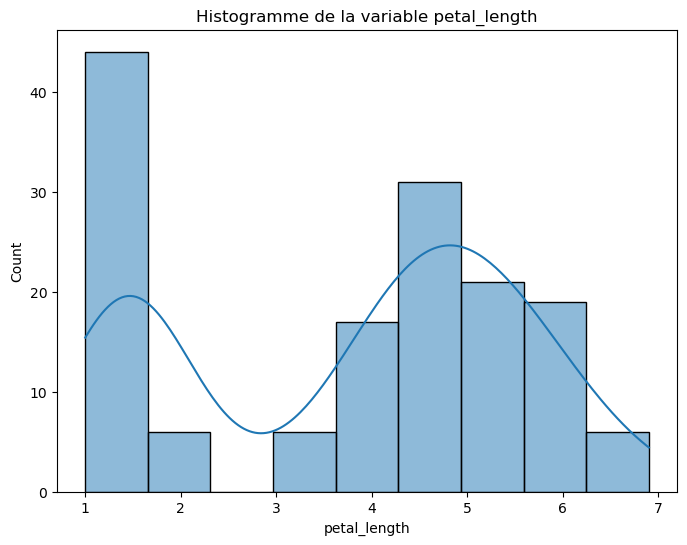

La variable petal_length ne suit pas une loi normale (p_value = 7.264667501338673e-49)


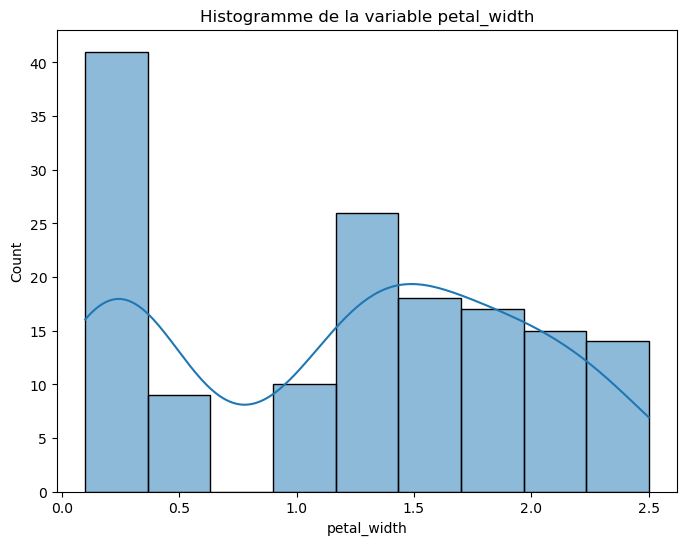

La variable petal_width ne suit pas une loi normale (p_value = 1.3492785927137586e-30)


In [12]:
# Analyse de la normalite

# Creation d'un histogramme et d'un test de normalite pour chaque variable

for column in df.columns[: - 1]:
    plt.figure(figsize = (8, 6))
    sns.histplot(data = df, x = column, kde = True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()
    
    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05 :
        print(f"La variable {column} ne suit pas une loi normale (p_value = {p_value})")
    else :
        print(f"La variable {column} suit une loi normale (p_value = {p_value})")

<Axes: xlabel='species', ylabel='count'>

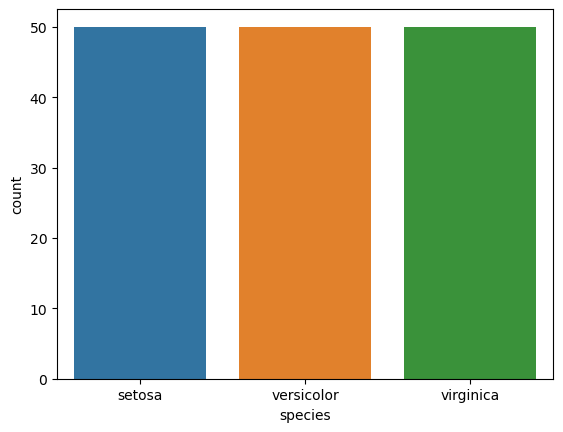

In [14]:
# Analyse de la variable qualitative

sns.countplot(x = df['species'])

In [15]:
# Creation d'un tableau de frequences pour la variable 'species'

freq_table = (df['species'].value_counts()) / len(df)
freq_table

setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: species, dtype: float64

([<matplotlib.patches.Wedge at 0x21c2056c2e0>,
 [Text(0.5499999702695115, 0.9526279613277875, 'setosa'),
  Text(-1.0999999999999954, -1.0298943258065002e-07, 'versicolor'),
  Text(0.5500001486524352, -0.9526278583383436, 'virginica')])

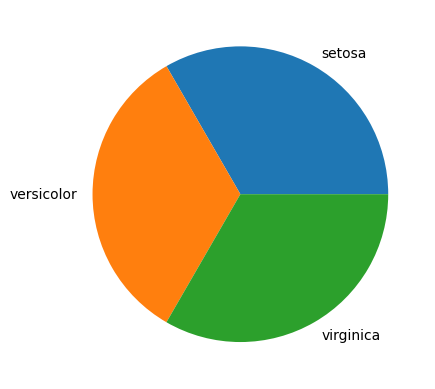

In [16]:
# Creation d'un tableau de frequences pour la variable 'species'

freq_table = (df['species'].value_counts()) / len(df)
freq_table

# Creation d'un diagramme circulaire pour le tableau de frequence

plt.pie(freq_table, labels = freq_table.index)

# 3- Analyse bivariées

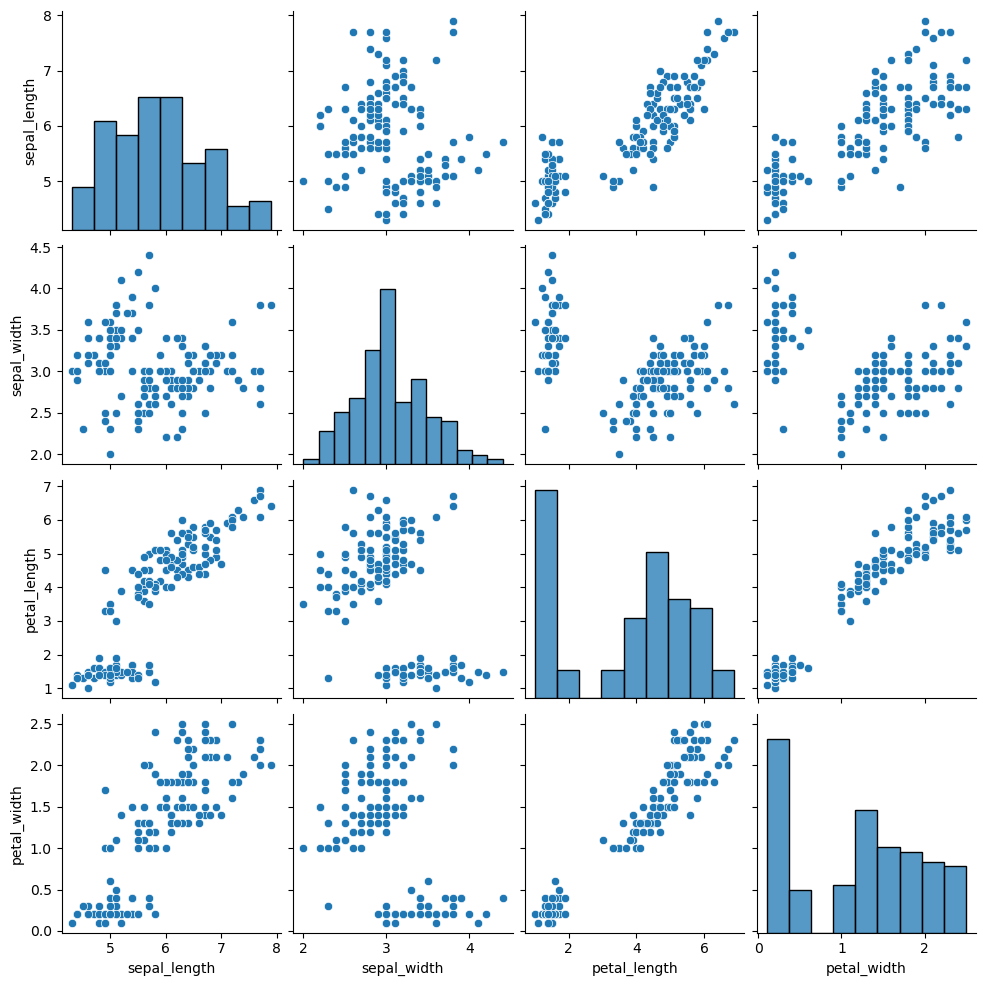

In [17]:
# Relation entre les variables quantitatives

sns.pairplot(df)

In [18]:
# Obtenons le tableau de correlation et la heatmap

corr_matrix = df.corr()

C:\Users\William Owoundi\AppData\Local\Temp\ipykernel_13184\2607936251.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


C:\Users\William Owoundi\AppData\Local\Temp\ipykernel_13184\1800884110.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

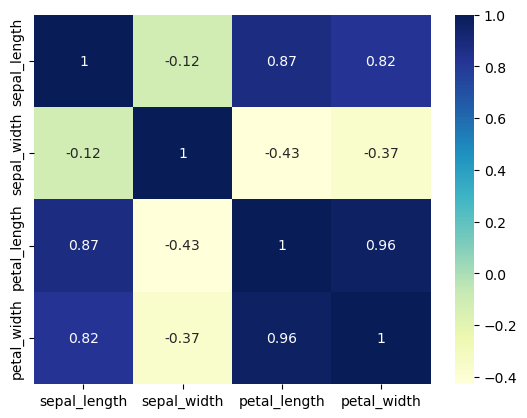

In [19]:
# Obtenons le tableau de correlation et la heatmap

corr_matrix = df.corr()

# Calculons les p-values pour chaque paire de variables

sns.heatmap(corr_matrix, annot = True, cmap = "YlGnBu")

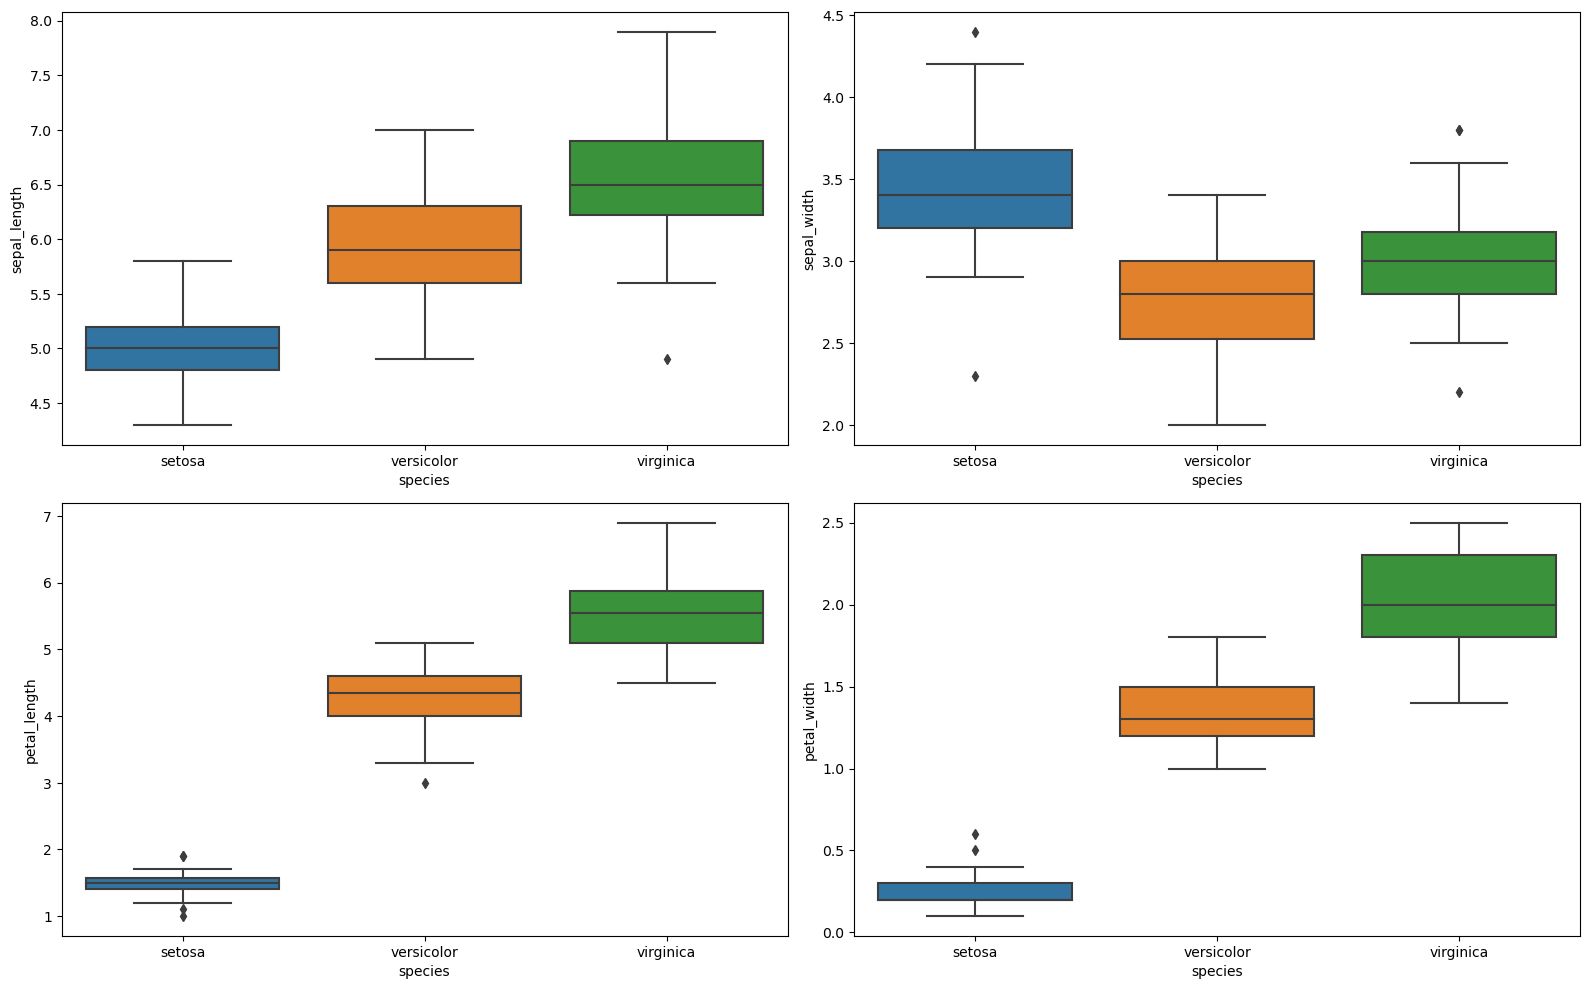

In [21]:
# Analyse des relations entre les variables et la variete de fleur

# Creation des boxplots pour chaque variable en fonction de l'espece de la fleur

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
row = 0
col = 0
for i in range(len(df.columns) - 1) :
    if col > 1:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = df['species'], y = df[df.columns[i]], ax = axes)
    col += 1
plt.tight_layout()

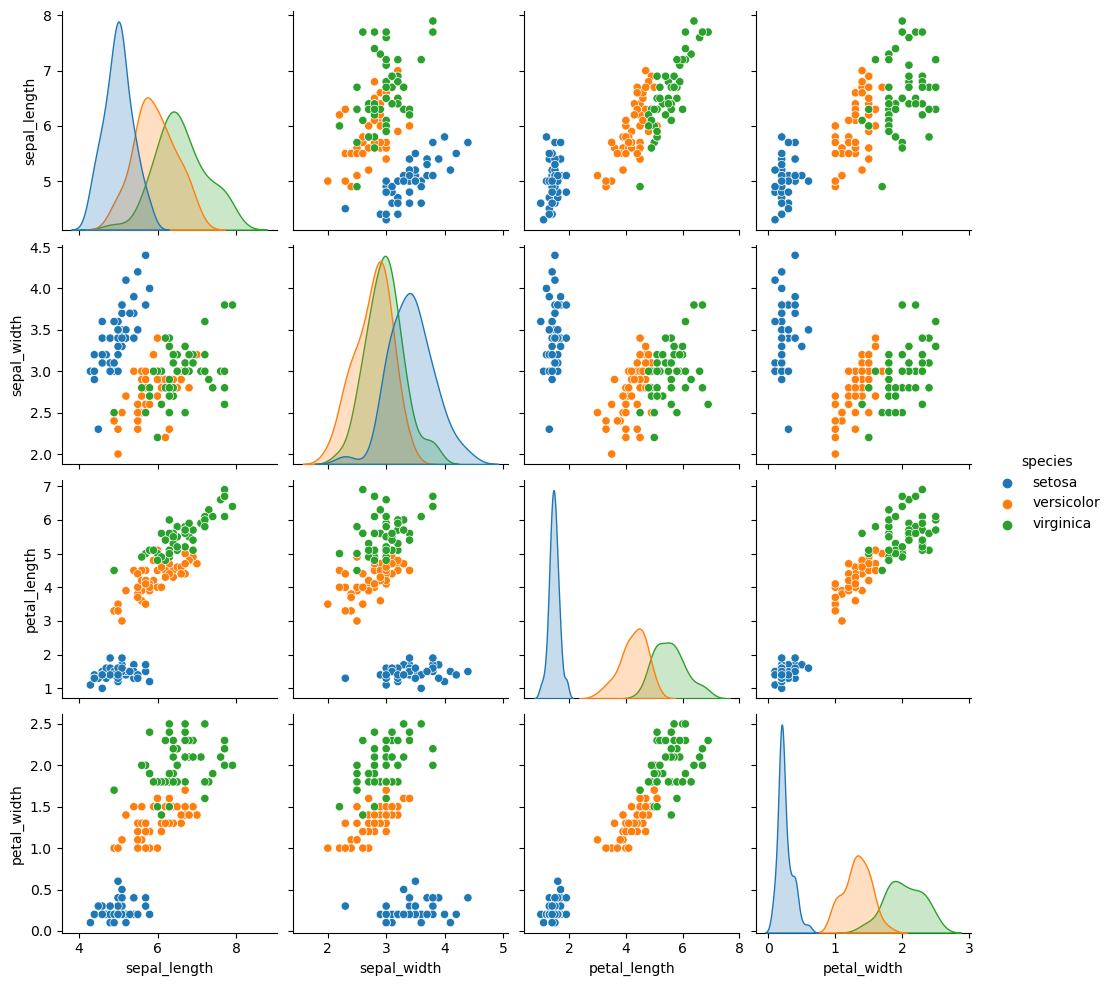

In [22]:
# pairplot

p = sns.pairplot(df, hue = 'species')

In [23]:
# Confirmation des liaisons avec un test de kruskal- wallis pour chaque variable

for column in df.columns[: - 1] :
    _, p_value = stats.kruskal(*[df[column][df.species == species] for species in df.species.unique()])
    if p_value < 0.05 :
        print(f"La variable {column} est significativement differente entre les especes (p_value = {p_value})")
    else :
        print(f"La variable {column} n'est pas significativement differente entre les especes (p_value = {p_value})")

La variable sepal_length est significativement differente entre les especes (p_value = 8.91873433246198e-22)
La variable sepal_width est significativement differente entre les especes (p_value = 1.5692820940316782e-14)
La variable petal_length est significativement differente entre les especes (p_value = 4.803973591157605e-29)
La variable petal_width est significativement differente entre les especes (p_value = 3.261795552421968e-29)


# 4- Analyse multivariée avec l'ACP

# Construction de l'ACP

In [24]:
# Separation des donnees en variables explicatives (X) et variable qualitative (Y)

x = df.iloc[:, : - 1].values
y = df.iloc[:, - 1].values

In [30]:
# Standardisation des donnees
# Normatisons les donnees

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
# Reduction de dimension

pca = PCA()
x_pca = pca.fit_transform(x)

## 5- Aide à l'interprétation

# Choix du nombre d'axe

In [32]:
# Analyse des valeurs propres

comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)],
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquee" : np.round(pca.explained_variance_ratio_ * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquee", "% cum. var. expliquee"]
)
comp

,Dimension,Valeur propre,% variance expliquee,% cum. var. expliquee
0,Dim1,4.228242,92.0,NaN
1,Dim2,0.242671,5.0,NaN
2,Dim3,0.078210,2.0,NaN
3,Dim4,0.023835,1.0,NaN


Text(3.25, 26, '25%')

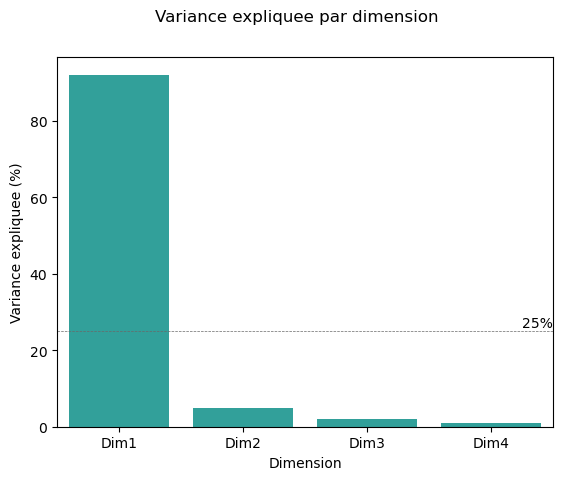

In [33]:
# Scree plot pour choisir le nombre de composantes principales

g_comp = sns.barplot(x = "Dimension",
                    y = "% variance expliquee",
                    palette = ["lightseagreen"],
                    data = comp)
g_comp.set(ylabel = "Variance expliquee (%)")
g_comp.figure.suptitle("Variance expliquee par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
plt.text(3.25, 26, "25%")

### 6- Autres aide à l'interprétation

##### Qualité de représentation des variables et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des variables sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des variables (cosinus carré)**

La qualité de représentation des variables est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les variables et les axes principaux. Le cosinus carré est également appelé **cos2**. Pour une variable donnée, la somme des cos2 sur tous les axes principaux est égale à 1.

La formule pour calculer le cos2 pour une variable `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$


ooù $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`.


**Un seuil couramment utilisé pour interpréter la qualité de représentation des variables est 0,5**. Si le cos2 d'une variable est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien la variable.

**Contribution des variables à la formation des axes (CTR)**

La contribution des variables à la formation des axes indique l'importance relative de chaque variable pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$


où :
- $\text{coord}(i, k)$ est la coordonnée de la variable `i` sur l'axe principal `k`
- $n$ est le nombre total de variables
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`


Il est important de noter que la somme des contributions des variables sur un axe principal donné est égale à 100 %.

En interprétant les contributions des variable  à la formation des axes, **il est courant de considérer les variables ayant une contribution supérieure à la contribution moyenne (100 % / nombre de variables)** comme étant importantes pour la formation de l'axe principal considéré.

In [35]:
# Calcul du cosinus carre des variables

cos_squared = np.square(pca.components_)

In [36]:
# Calcul du cosinus carre des variables

cos_squared = np.square(pca.components_)

# Creation d'un Dataframe pandas avec le cosinus carre des variables

df_cos_squared = pd.DataFrame(cos_squared, columns = ['PC{}'.format(i + 1) for i in range(x.shape[1])])
df_cos_squared.index = df.columns[: - 1]

print(df_cos_squared)

                   PC1       PC2       PC3       PC4
sepal_length  0.130600  0.007144  0.733885  0.128371
sepal_width   0.431109  0.533136  0.030058  0.005697
petal_length  0.338759  0.357497  0.005812  0.297932
petal_width   0.099532  0.102223  0.230245  0.568000


In [37]:
# Contribution a la formation de l'axe
# Obtenir les composantes principales

components = pca.components_

n_components = x.shape[1]
feature_names = df.columns[0 : 4]

In [38]:
# Contribution a la formation de l'axe
# Obtenir les composantes principales

components = pca.components_

n_components = x.shape[1]
feature_names = df.columns[0 : 4]

# Calculons la contribution des variables a la formation des axes

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings ** 2) * eigenvalues

In [39]:
# Contribution a la formation de l'axe
# Obtenir les composantes principales

components = pca.components_

n_components = x.shape[1]
feature_names = df.columns[0 : 4]

# Calculons la contribution des variables a la formation des axes

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings ** 2) * eigenvalues

# Creation du DataFrame pour faciliter l'affichage des resultats

column_names = [f'PC{i + 1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contributions, columns = column_names, index = feature_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal_length     0.552210     0.104617     0.026494     0.002372
sepal_width      0.030207     0.129376     0.027960     0.002436
petal_length     3.103041     0.007294     0.000455     0.005488
petal_width      0.542784     0.001383     0.023301     0.013538


In [40]:
# Calculons la contribution des variables a la formation des axes

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings ** 2) * eigenvalues

In [41]:
# Calculons la contribution des variables a la formation des axes

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings ** 2) * eigenvalues

# Convertir les contributions en pourcentage

variable_contrib_percent = variable_contributions / eigenvalues * 100



In [42]:
# Calculons la contribution des variables a la formation des axes

loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings ** 2) * eigenvalues

# Convertir les contributions en pourcentage

variable_contrib_percent = variable_contributions / eigenvalues * 100

# Creation d'un DataFrame pour faciliter l'affichage des resultats

column_names = [f'PC{i + 1}_contrib' for i in range(n_components)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns = column_names, index = feature_names)

print(variable_contrib_df)

              PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
sepal_length    13.060027    43.110881    33.875875     9.953217
sepal_width      0.714406    53.313572    35.749736    10.222286
petal_length    73.388453     3.005808     0.581194    23.024545
petal_width     12.837115     0.569738    29.793195    56.799951


#### Qualité de représentation des individus et contribution à la formation des axes

Lors de l'analyse en composantes principales (ACP), il est important de mesurer la qualité de représentation des individus sur les axes principaux et leur contribution à la formation de ces axes.

**Qualité de représentation des individus (cosinus carré)**

La qualité de représentation des individus est souvent mesurée à l'aide du carré du cosinus de l'angle entre les vecteurs représentant les individus et les axes principaux. Le cosinus carré est également appelé **cos²**. Pour un individu donné, la somme des cos² sur tous les axes principaux est égale à 1.

La formule pour calculer le cos² pour un individu `i` sur un axe principal `k` est la suivante :

$$
\text{cos}^2(i, k) = \frac{\text{coord}(i, k)^2}{\lVert\text{coord}(i)\rVert^2}
$$

où $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`.

Un seuil couramment utilisé pour interpréter la qualité de représentation des individus est 0,5. Si le cos² d'un individu est supérieur à 0,5 sur un axe principal, cela signifie que cet axe représente bien l'individu.

**Contribution des individus à la formation des axes (CTR)**

La contribution des individus à la formation des axes indique l'importance relative de chaque individu pour expliquer la variabilité des données sur un axe principal donné. Cette contribution est souvent exprimée en pourcentage et est calculée à l'aide de la formule suivante :

$$
\text{CTR}(i, k) = \frac{\text{coord}(i, k)^2}{n \cdot \lambda_k}
$$

où :
- $\text{coord}(i, k)$ est la coordonnée de l'individu `i` sur l'axe principal `k`
- $n$ est le nombre total d'individus
- $\lambda_k$ est la valeur propre associée à l'axe principal `k`

Il est important de noter que la somme des contributions des individus sur un axe principal donné est égale à 100 %.

En interprétant les contributions des individus à la formation des axes, **il est courant de considérer les individus ayant une contribution supérieure à la contribution moyenne (100 % / nombre d'individus) comme étant importants pour la formation de l'axe principal considéré**.

In [43]:
# Calculons la contribution des individus a la formation des axes

eigenvalues = pca.explained_variance_
contributions = (x_pca ** 2) / (x_pca.shape[0] * eigenvalues)

In [44]:
# Calculons la contribution des individus a la formation des axes

eigenvalues = pca.explained_variance_
contributions = (x_pca ** 2) / (x_pca.shape[0] * eigenvalues)

# Convertissons les contributions en pourcentage

contrib_percent = contributions * 100

In [45]:
# Calculons la contribution des individus a la formation des axes

eigenvalues = pca.explained_variance_
contributions = (x_pca ** 2) / (x_pca.shape[0] * eigenvalues)

# Convertissons les contributions en pourcentage

contrib_percent = contributions * 100

# Creons un DataFrame pour faciliter l'affichage des resultats

column_names = [f'PC{i + 1}_contrib' for i in range(n_components)]
contrib_df = pd.DataFrame(contrib_percent, columns = column_names)

print(contrib_df)

     PC1_contrib  PC2_contrib  PC3_contrib  PC4_contrib
0       1.135938     0.280255     0.006642     0.000143
1       1.161486     0.086068     0.377577     0.274281
2       1.315955     0.057720     0.002731     0.011153
3       1.188344     0.278331     0.008490     0.159756
4       1.173994     0.293315     0.069167     0.104961
..           ...          ...          ...          ...
145     0.595923     0.096615     0.269548     5.080547
146     0.367724     0.386979     0.126661     1.809735
147     0.490813     0.017084     0.145127     0.524978
148     0.569753     0.037368     4.458903     0.055625
149     0.304717     0.219494     1.122655     0.672313

[150 rows x 4 columns]


# 7- Représentation graphique et interprétation

In [46]:
# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

In [47]:
# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Creons la figure
plt.figure(figsize = (10, 10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

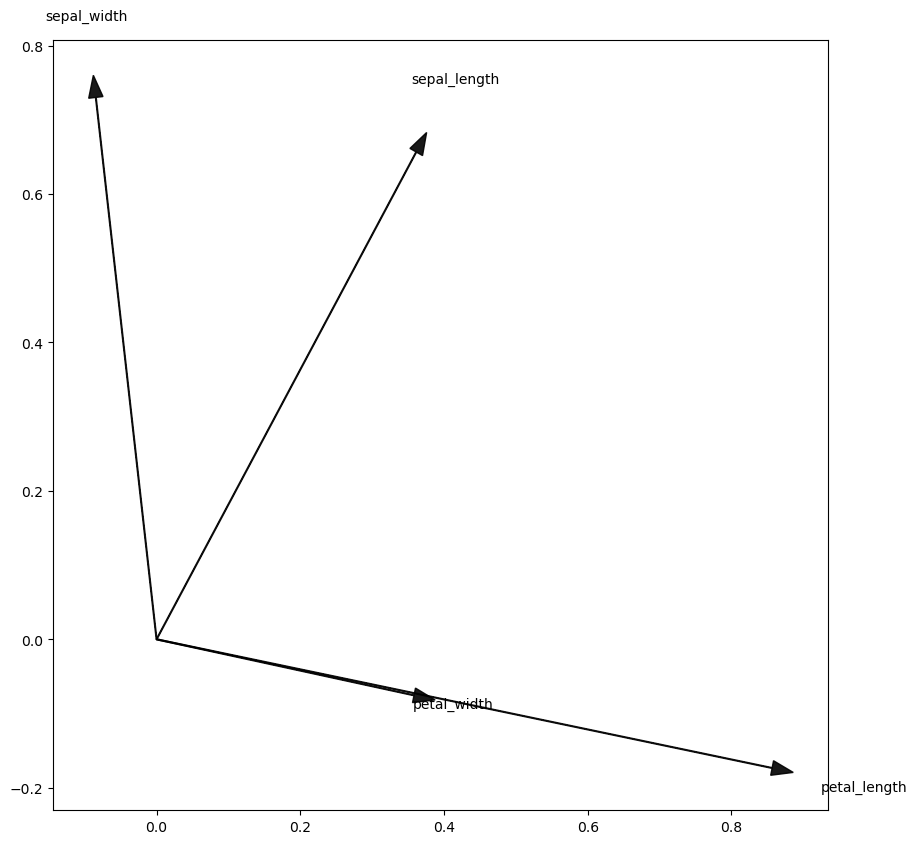

In [48]:
# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Creons la figure
plt.figure(figsize = (10, 10))

# Placons les vecteurs des variables

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color = 'k', ha = 'center', va = 'center')

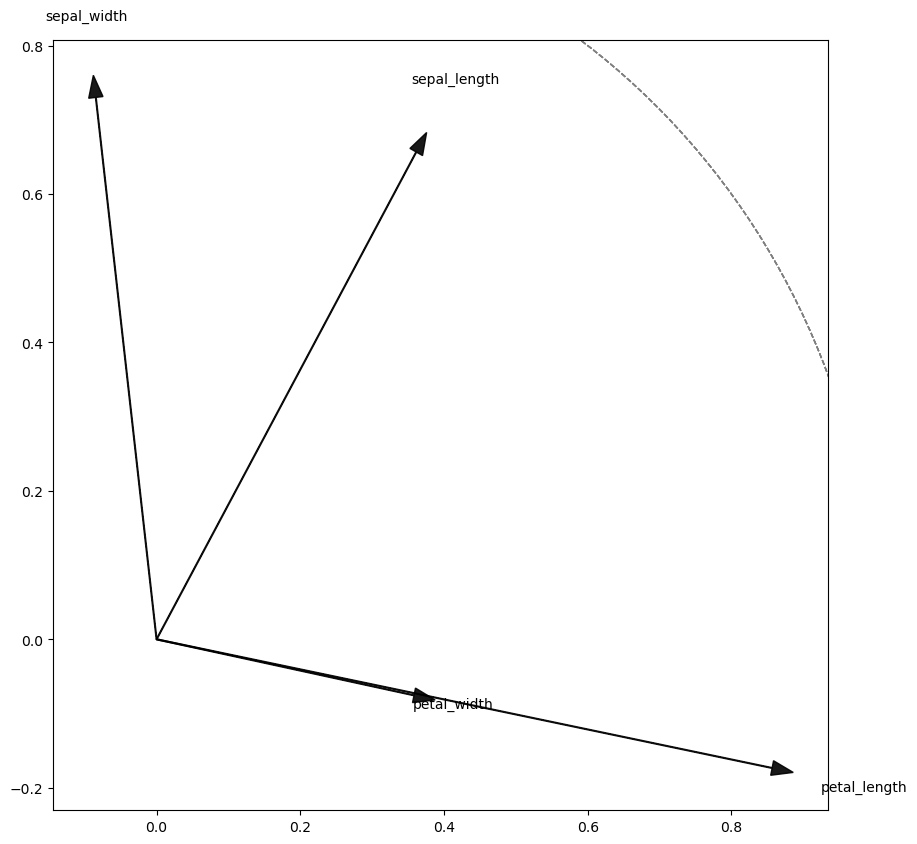

In [49]:
# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Creons la figure
plt.figure(figsize = (10, 10))

# Placons les vecteurs des variables

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color = 'k', ha = 'center', va = 'center')
    
    # Placons le cercle unitaire
    
    circle = plt.Circle((0, 0), 1, color = 'gray', fill = False, linestyle = '--')
    plt.gca().add_artist(circle)

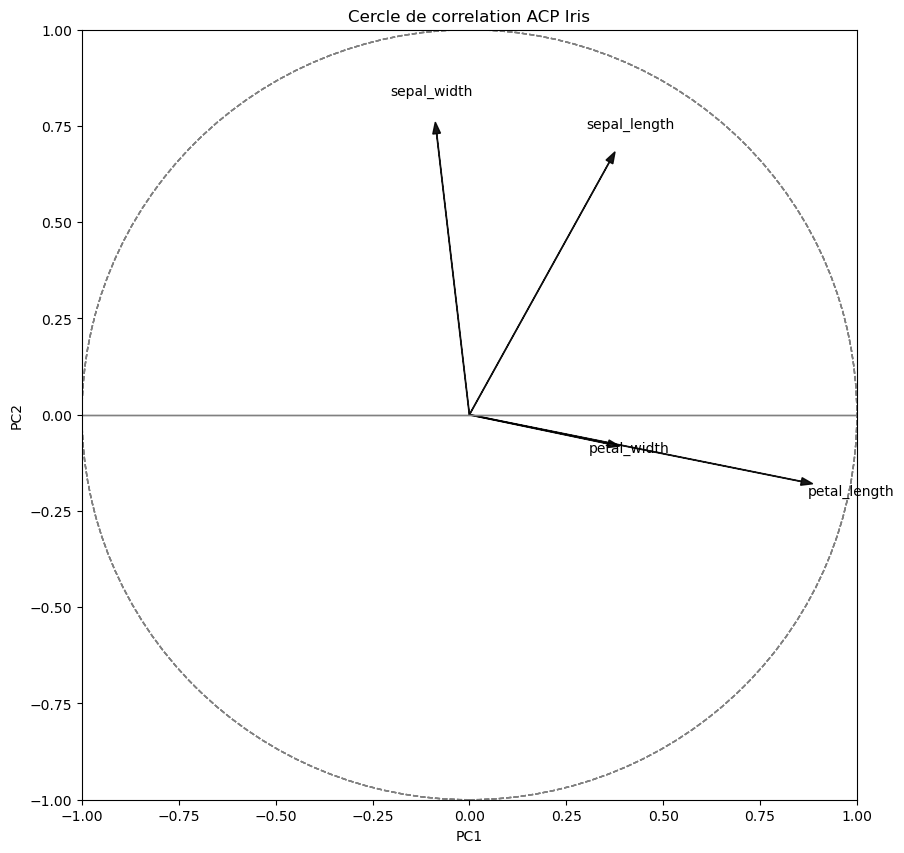

In [50]:
# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]
xs = np.array([1, 0])
ys = np.array([0, 1])

# Creons la figure
plt.figure(figsize = (10, 10))

# Placons les vecteurs des variables

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02)
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, feature_names[i], color = 'k', ha = 'center', va = 'center')
    
    # Placons le cercle unitaire
    
    circle = plt.Circle((0, 0), 1, color = 'gray', fill = False, linestyle = '--')
    plt.gca().add_artist(circle)
    
# Ajustons les limites et les axes

plt.xlim(- 1, 1)
plt.ylim(- 1, 1)
plt.axhline(0, color = 'gray', linewidth = 1)
plt.axhline(0, color = 'gray', linewidth = 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Cercle de correlation ACP Iris")

# Affichons la figure

plt.show()

In [51]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

In [52]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [53]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

In [54]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

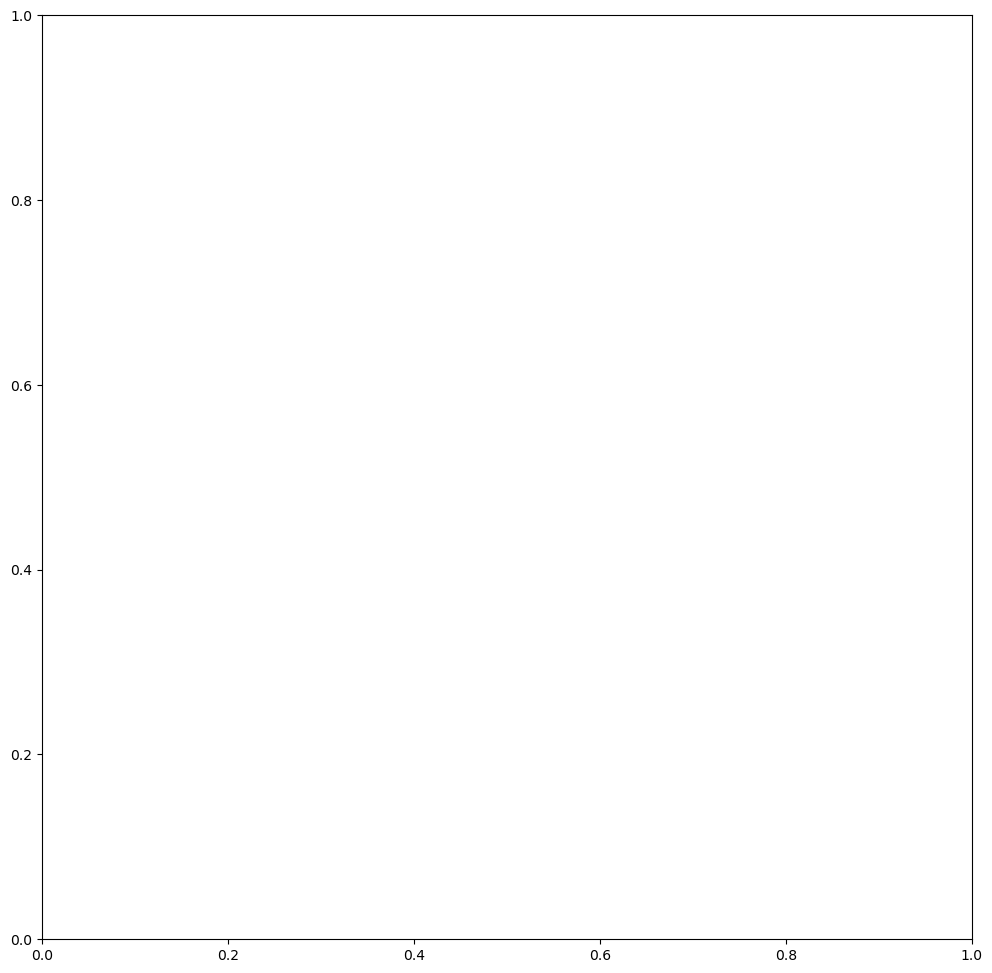

In [55]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

# Creons la figure 

fig, ax = plt.subplots(figsize = (12, 12))



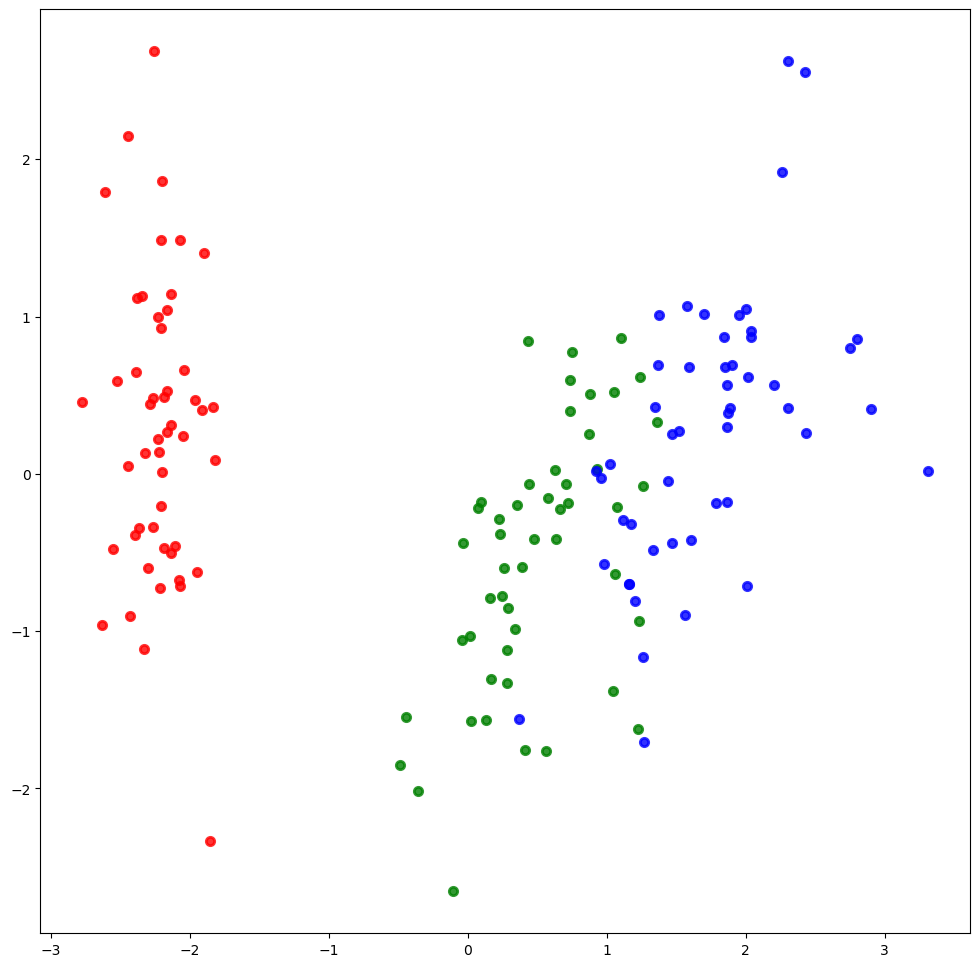

In [56]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

# Creons la figure 

fig, ax = plt.subplots(figsize = (12, 12))

# Visualisons les categories d'especes avec les couleurs

colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color = color, alpha = .8, lw =lw, label = target_name)

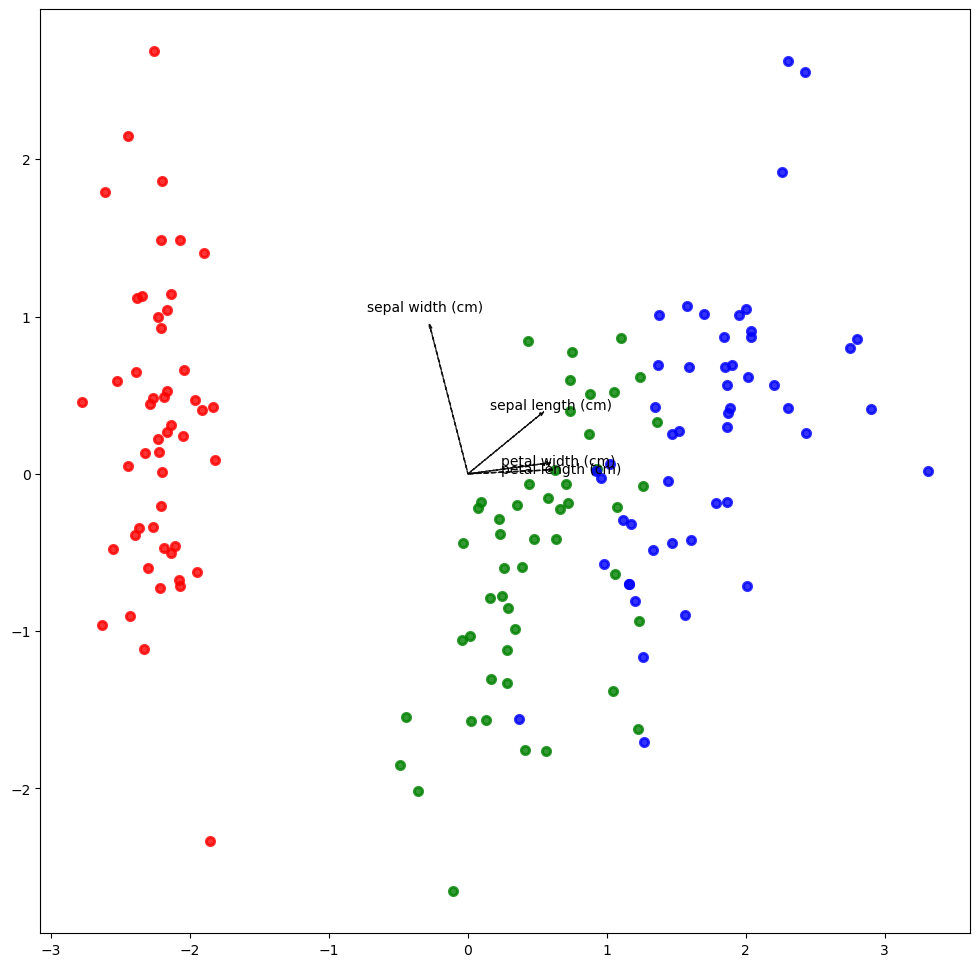

In [64]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

# Creons la figure 

fig, ax = plt.subplots(figsize = (12, 12))

# Visualisons les categories d'especes avec les couleurs

colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color = color, alpha = .8, lw =lw, label = target_name)
    
# Placons les vecteurs des variables

for i in range(n) :
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02, linestyle = '--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color = 'k', ha = 'center', va = 'center')


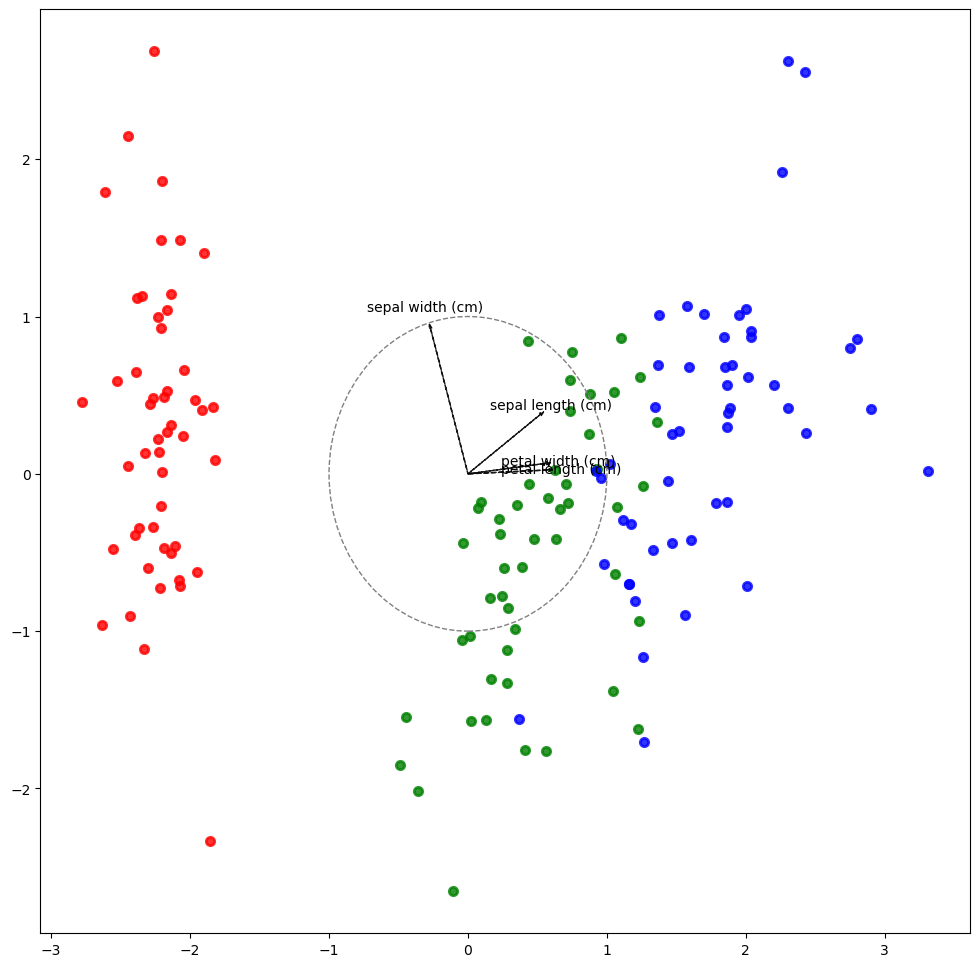

In [63]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

# Creons la figure 

fig, ax = plt.subplots(figsize = (12, 12))

# Visualisons les categories d'especes avec les couleurs

colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color = color, alpha = .8, lw =lw, label = target_name)
    
# Placons les vecteurs des variables

for i in range(n) :
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02, linestyle = '--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color = 'k', ha = 'center', va = 'center')

# Placons le cercle unitaire

circle = plt.Circle((0, 0), 1, color = 'gray', fill = False, linestyle = '--')
plt.gca().add_artist(circle)

Text(0.5, 1.0, 'ACP Iris avec cercle de correlation et nuage des individus par categorie')

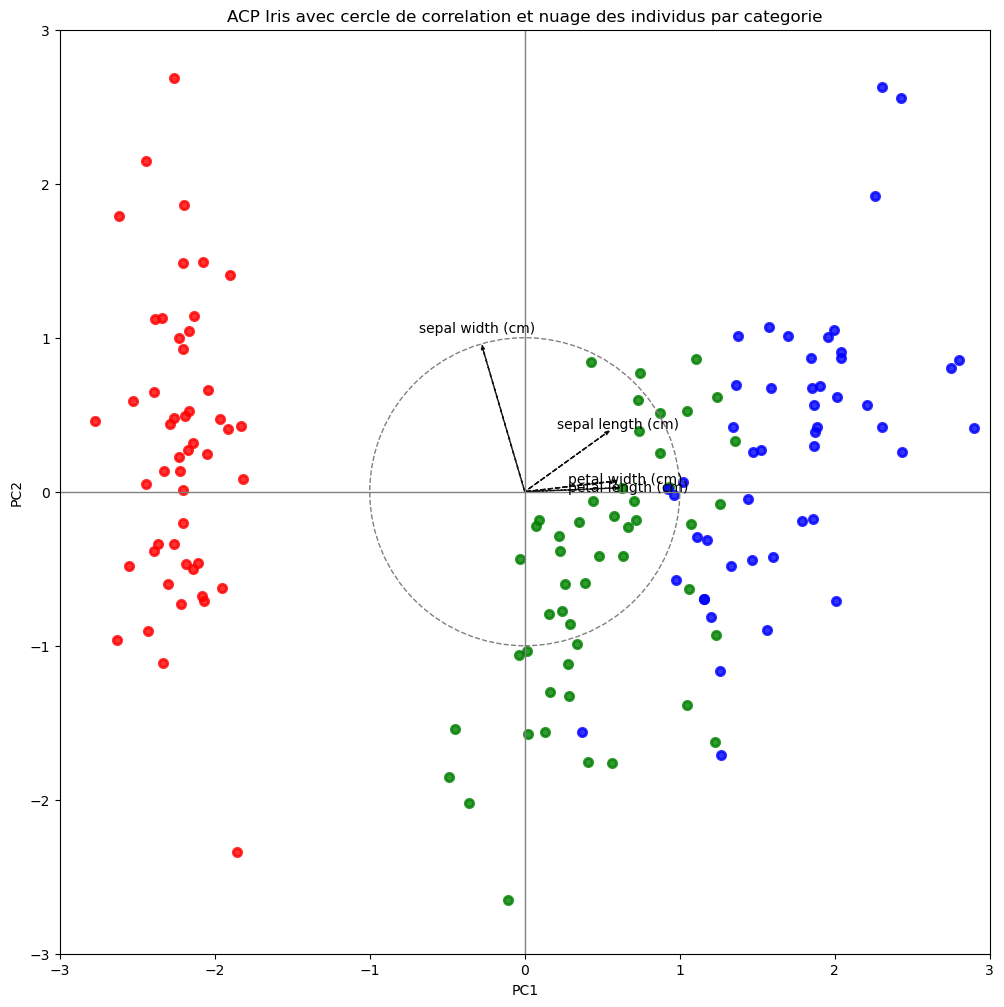

In [62]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

# Creons la figure 

fig, ax = plt.subplots(figsize = (12, 12))

# Visualisons les categories d'especes avec les couleurs

colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color = color, alpha = .8, lw =lw, label = target_name)
    
# Placons les vecteurs des variables

for i in range(n) :
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02, linestyle = '--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color = 'k', ha = 'center', va = 'center')

# Placons le cercle unitaire

circle = plt.Circle((0, 0), 1, color = 'gray', fill = False, linestyle = '--')
plt.gca().add_artist(circle)

# Ajustons les limites et les axes

plt.xlim(- 3, 3)
plt.ylim(- 3, 3)
plt.axhline(0, color = 'gray', linewidth = 1)
plt.axvline(0, color = 'gray', linewidth = 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de correlation et nuage des individus par categorie')

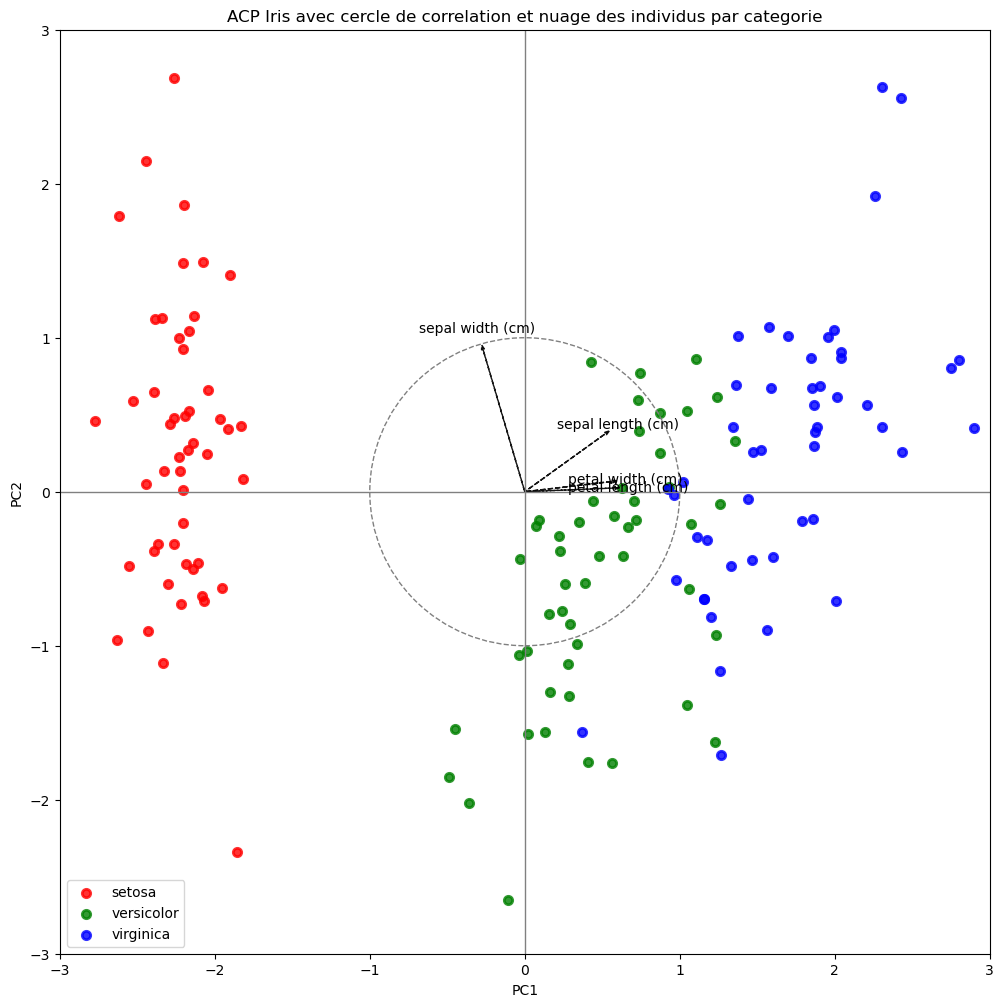

In [61]:
from sklearn.datasets import load_iris

# Chargeons les donnees Iris

iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

# Normalisons les donnees

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Appliquons l'ACP

pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Creons le cercle de correlation

coeff = np.transpose(pca.components_[0 : 2, :])
n = coeff.shape[0]

# Creons la figure 

fig, ax = plt.subplots(figsize = (12, 12))

# Visualisons les categories d'especes avec les couleurs

colors = ['r', 'g', 'b']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color = color, alpha = .8, lw =lw, label = target_name)
    
# Placons les vecteurs des variables

for i in range(n) :
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha = 0.9, head_width = 0.02, linestyle = '--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, iris.feature_names[i], color = 'k', ha = 'center', va = 'center')

# Placons le cercle unitaire

circle = plt.Circle((0, 0), 1, color = 'gray', fill = False, linestyle = '--')
plt.gca().add_artist(circle)

# Ajustons les limites et les axes

plt.xlim(- 3, 3)
plt.ylim(- 3, 3)
plt.axhline(0, color = 'gray', linewidth = 1)
plt.axvline(0, color = 'gray', linewidth = 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP Iris avec cercle de correlation et nuage des individus par categorie')

# Affichons la legende 

plt.legend(loc = 'best', shadow = False, scatterpoints = 1)

# Affichons la figure

plt.show()